In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R
require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [19]:
%%R
# Load the data.csv
data <- read.csv("data.csv")
data %>% head

  Fiscal.Year             Employer..Petitioner..Name Symbol fullTimeEmployees
1        2023                AMAZON.COM SERVICES LLC   AMZN           1525000
2        2023 COGNIZANT TECHNOLOGY SOLUTIONS US CORP   CTSH            347700
3        2023

                        INFOSYS LIMITED   INFY            322663
4        2023                             GOOGLE LLC   GOOG            182502
5        2023                  CAPGEMINI AMERICA INC  CGEMY            340400
6        2023                  MICROSOFT CORPORATION   MSFT            221000
  layoff Initial.Approval Continuing.Approval Industry_code       mktCap Tax.ID
1   3879             2776                8414            44 1.941610e+12   4687
2    302             2390                4491            54 3.461446e+10   4155
3      0             2128                4944            54 7.309682e+10    235
4   1061             1262                4166            54 1.984410e+12   3581
5      0             1095                1666            54 3.769189e+10   5929
6   3426              984                3798            51 3.138170e+12   4442
                                  Industry..NAICS..Code Petitioner.City
1                                  44-45 - Retail Trade       ARLINGT

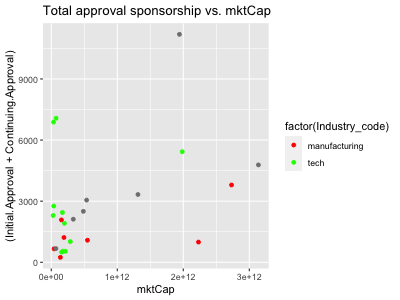

In [28]:
%%R -w 400 -h 300
# plot Initial.Approval+Continuing.Approval vs. mktCap, color by Industry_code
# title="Total approval sponsorship vs. mktCap"
ggplot(data, aes(x=mktCap, y=(Initial.Approval+Continuing.Approval), color=factor(Industry_code))) + 
geom_point() +
scale_color_manual(values=c("31"="red", "54"="green"), labels=c("31"="manufacturing", "54"="tech"))+
ggtitle("Total approval sponsorship vs. mktCap")

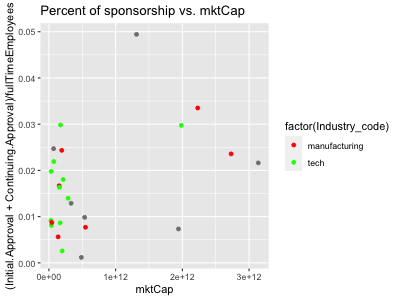

In [29]:
%%R -w 400 -h 300
# plot Initial.Approval+Continuing.Approval vs. mktCap, color by Industry_code
# title="Total approval sponsorship vs. mktCap"
# add a green fit line for Industry_code=54
ggplot(data, aes(x=mktCap, y=(Initial.Approval+Continuing.Approval)/fullTimeEmployees, color=factor(Industry_code))) + 
geom_point() +
scale_color_manual(values=c("31"="red", "54"="green"), labels=c("31"="manufacturing", "54"="tech")) +
ggtitle("Percent of sponsorship vs. mktCap")


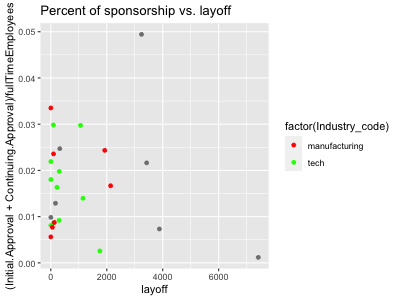

In [30]:
%%R -w 400 -h 300
# plot Initial.Approval+Continuing.Approval vs. mktCap, color by Industry_code
# title="Total approval sponsorship vs. mktCap"
# add a green fit line for Industry_code=54
ggplot(data, aes(x=layoff, y=(Initial.Approval+Continuing.Approval)/fullTimeEmployees, color=factor(Industry_code))) + 
geom_point() +
scale_color_manual(values=c("31"="red", "54"="green"), labels=c("31"="manufacturing", "54"="tech")) +
ggtitle("Percent of sponsorship vs. layoff")

In [32]:
%%R
# multi linear regression, Y = Initial.Approval+Continuing.Approval, X = mktCap, fullTimeEmployees, layoff, Industry_code
model <- lm((Initial.Approval+Continuing.Approval) ~ mktCap + fullTimeEmployees + layoff, data=data)
summary(model)


Call:
lm(formula = (Initial.Approval + Continuing.Approval) ~ mktCap + 
    fullTimeEmployees + layoff, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3416.3 -1185.1  -190.7   617.9  4376.0 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        1.341e+03  5.883e+02   2.279   0.0332 *
mktCap             1.250e-09  4.941e-10   2.530   0.0195 *
fullTimeEmployees  3.917e-03  1.456e-03   2.690   0.0137 *
layoff            -5.738e-01  4.144e-01  -1.384   0.1807  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2138 on 21 degrees of freedom
Multiple R-squared:  0.4101,	Adjusted R-squared:  0.3258 
F-statistic: 4.866 on 3 and 21 DF,  p-value: 0.01006



In [34]:
%%R
# filter Industry_code = 54, multi linear regression, Y = Initial.Approval+Continuing.Approval, X = mktCap, fullTimeEmployees, layoff
model <- lm((Initial.Approval+Continuing.Approval)/fullTimeEmployees ~ mktCap + layoff/fullTimeEmployees, data=filter(data, Industry_code==54))
summary(model)


Call:
lm(formula = (Initial.Approval + Continuing.Approval)/fullTimeEmployees ~ 
    mktCap + layoff/fullTimeEmployees, data = filter(data, Industry_code == 
    54))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0084565 -0.0029412 -0.0000904  0.0026429  0.0124504 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.603e-02  2.952e-03   5.431 0.000976 ***


mktCap                    9.800e-15  5.194e-15   1.887 0.101165    
layoff                   -3.778e-06  8.324e-06  -0.454 0.663691    
layoff:fullTimeEmployees -6.839e-12  1.184e-11  -0.578 0.581464    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00737 on 7 degrees of freedom
Multiple R-squared:  0.5127,	Adjusted R-squared:  0.3039 
F-statistic: 2.455 on 3 and 7 DF,  p-value: 0.1479

